In [1]:
pip install networkx



[notice] A new release of pip is available: 23.3.2 -> 24.0
[notice] To update, run: pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


In [2]:
pip install matplotlib


[notice] A new release of pip is available: 23.3.2 -> 24.0
[notice] To update, run: pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


In [3]:
import networkx as nx

In [4]:
import pandas as pd
import networkx as nx
import matplotlib.pyplot as plt

# Load race data
circuits_data = pd.read_csv('/Users/angelsheu/Desktop/Customer& Social/project/drive-download-20240302T222425Z-001/circuits.csv') 
constructor_results_data = pd.read_csv('/Users/angelsheu/Desktop/Customer& Social/project/drive-download-20240302T222425Z-001/constructor_results.csv')  
constructor_standings_data = pd.read_csv('/Users/angelsheu/Desktop/Customer& Social/project/drive-download-20240302T222425Z-001/constructor_standings.csv')
constructor_data = pd.read_csv('/Users/angelsheu/Desktop/Customer& Social/project/drive-download-20240302T222425Z-001/constructors.csv')  
driver_standings_data = pd.read_csv('/Users/angelsheu/Desktop/Customer& Social/project/drive-download-20240302T222425Z-001/driver_standings.csv')  
driver_data = pd.read_csv('/Users/angelsheu/Desktop/Customer& Social/project/drive-download-20240302T222425Z-001/drivers.csv')  
#lap_times_data = pd.read_csv('lap_times.csv')  #not looking at this
#pit_stops_data = pd.read_csv('pit_stops.csv') #not looking at this
#qualifying_data = pd.read_csv('qualifying.csv') #not looking at this
race_data = pd.read_csv('/Users/angelsheu/Desktop/Customer& Social/project/drive-download-20240302T222425Z-001/races.csv')  
results_data = pd.read_csv('/Users/angelsheu/Desktop/Customer& Social/project/drive-download-20240302T222425Z-001/results.csv')  
#seasons_data = pd.read_csv('seasons.csv') #not looking at this
#sprint_results_data = pd.read_csv('sprint_results.csv') #not looking at this
#status_data = pd.read_csv('status.csv') #not looking at this

















In [5]:
circuits_data.head() 

circuitId   circuitRef                            name      location  \
0          1  albert_park  Albert Park Grand Prix Circuit     Melbourne   
1          2       sepang    Sepang International Circuit  Kuala Lumpur   
2          3      bahrain   Bahrain International Circuit        Sakhir   
3          4    catalunya  Circuit de Barcelona-Catalunya      Montmeló   
4          5     istanbul                   Istanbul Park      Istanbul   

     country       lat        lng  alt  \
0  Australia -37.84970  144.96800   10   
1   Malaysia   2.76083  101.73800   18   
2    Bahrain  26.03250   50.51060    7   
3      Spain  41.57000    2.26111  109   
4     Turkey  40.95170   29.40500  130   

                                                 url  
0  http://en.wikipedia.org/wiki/Melbourne_Grand_P...  
1  http://en.wikipedia.org/wiki/Sepang_Internatio...  
2  http://en.wikipedia.org/wiki/Bahrain_Internati...  
3  http://en.wikipedia.org/wiki/Circuit_de_Barcel...  
4         http://en.wikipedia.org/wiki/Istanbul_Park

In [6]:
constructor_results_data.head()

constructorResultsId  raceId  constructorId  points status
0                     1      18              1    14.0     \N
1                     2      18              2     8.0     \N
2                     3      18              3     9.0     \N
3                     4      18              4     5.0     \N
4                     5      18              5     2.0     \N

In [7]:
constructor_standings_data.head()

constructorStandingsId  raceId  constructorId  points  position  \
0                       1      18              1    14.0         1   
1                       2      18              2     8.0         3   
2                       3      18              3     9.0         2   
3                       4      18              4     5.0         4   
4                       5      18              5     2.0         5   

  positionText  wins  
0            1     1  
1            3     0  
2            2     0  
3            4     0  
4            5     0

In [8]:

constructor_data.head() #merge with results to get constructor name for easy viz

constructorId constructorRef        name nationality  \
0              1        mclaren     McLaren     British   
1              2     bmw_sauber  BMW Sauber      German   
2              3       williams    Williams     British   
3              4        renault     Renault      French   
4              5     toro_rosso  Toro Rosso     Italian   

                                                 url  
0               http://en.wikipedia.org/wiki/McLaren  
1            http://en.wikipedia.org/wiki/BMW_Sauber  
2  http://en.wikipedia.org/wiki/Williams_Grand_Pr...  
3  http://en.wikipedia.org/wiki/Renault_in_Formul...  
4   http://en.wikipedia.org/wiki/Scuderia_Toro_Rosso

In [9]:
driver_standings_data.head() 

driverStandingsId  raceId  driverId  points  position positionText  wins
0                  1      18         1    10.0         1            1     1
1                  2      18         2     8.0         2            2     0
2                  3      18         3     6.0         3            3     0
3                  4      18         4     5.0         4            4     0
4                  5      18         5     4.0         5            5     0

In [10]:
driver_data.head() #merge driverRef (?)

driverId   driverRef number code  forename     surname         dob  \
0         1    hamilton     44  HAM     Lewis    Hamilton  1985-01-07   
1         2    heidfeld     \N  HEI      Nick    Heidfeld  1977-05-10   
2         3     rosberg      6  ROS      Nico     Rosberg  1985-06-27   
3         4      alonso     14  ALO  Fernando      Alonso  1981-07-29   
4         5  kovalainen     \N  KOV    Heikki  Kovalainen  1981-10-19   

  nationality                                             url  
0     British     http://en.wikipedia.org/wiki/Lewis_Hamilton  
1      German      http://en.wikipedia.org/wiki/Nick_Heidfeld  
2      German       http://en.wikipedia.org/wiki/Nico_Rosberg  
3     Spanish    http://en.wikipedia.org/wiki/Fernando_Alonso  
4     Finnish  http://en.wikipedia.org/wiki/Heikki_Kovalainen

In [11]:
race_data.head()

raceId  year  round  circuitId                   name        date  \
0       1  2009      1          1  Australian Grand Prix  2009-03-29   
1       2  2009      2          2   Malaysian Grand Prix  2009-04-05   
2       3  2009      3         17     Chinese Grand Prix  2009-04-19   
3       4  2009      4          3     Bahrain Grand Prix  2009-04-26   
4       5  2009      5          4     Spanish Grand Prix  2009-05-10   

       time                                                url fp1_date  \
0  06:00:00  http://en.wikipedia.org/wiki/2009_Australian_G...       \N   
1  09:00:00  http://en.wikipedia.org/wiki/2009_Malaysian_Gr...       \N   
2  07:00:00  http://en.wikipedia.org/wiki/2009_Chinese_Gran...       \N   
3  12:00:00  http://en.wikipedia.org/wiki/2009_Bahrain_Gran...       \N   
4  12:00:00  http://en.wikipedia.org/wiki/2009_Spanish_Gran...       \N   

  fp1_time fp2_date fp2_time fp3_date fp3_time quali_date quali_time  \
0       \N       \N       \N       \N       \N         \N         \N   
1       \N       \N       \N       \N       \N         \N         \N   
2       \N       \N       \N       \N       \N         \N         \N   
3       \N       \N       \N       \N       \N         \N         \N   
4       \N       \N       \N       \N       \N         \N         \N   

  sprint_date sprint_time  
0          \N          \N  
1          \N          \N  
2          \N          \N  
3          \N          \N  
4          \N          \N

In [12]:
results_data

resultId  raceId  driverId  constructorId number  grid position  \
0             1      18         1              1     22     1        1   
1             2      18         2              2      3     5        2   
2             3      18         3              3      7     7        3   
3             4      18         4              4      5    11        4   
4             5      18         5              1     23     3        5   
...         ...     ...       ...            ...    ...   ...      ...   
26075     26081    1110       817            213      3    19       16   
26076     26082    1110       858              3      2    18       17   
26077     26083    1110       807            210     27     0       18   
26078     26084    1110       832              6     55     4       \N   
26079     26085    1110       857              1     81     5       \N   

      positionText  positionOrder  points  laps         time milliseconds  \
0                1              1    10.0    58  1:34:50.616      5690616   
1                2              2     8.0    58       +5.478      5696094   
2                3              3     6.0    58       +8.163      5698779   
3                4              4     5.0    58      +17.181      5707797   
4                5              5     4.0    58      +18.014      5708630   
...            ...            ...     ...   ...          ...          ...   
26075           16             16     0.0    44    +1:43.071      5053521   
26076           17             17     0.0    44    +1:44.476      5054926   
26077           18             18     0.0    44    +1:50.450      5060900   
26078            R             19     0.0    23           \N           \N   
26079            R             20     0.0     0           \N           \N   

      fastestLap rank fastestLapTime fastestLapSpeed  statusId  
0             39    2       1:27.452         218.300         1  
1             41    3       1:27.739         217.586         1  
2             41    5       1:28.090         216.719         1  
3             58    7       1:28.603         215.464         1  
4             43    1       1:27.418         218.385         1  
...          ...  ...            ...             ...       ...  
26075         25   15       1:50.994         227.169         1  
26076         37    9       1:50.486         228.213         1  
26077         26    4       1:49.907         229.415         1  
26078          9   19       1:53.138         222.864       130  
26079         \N    0             \N              \N       130  

[26080 rows x 18 columns]

In [13]:
# Merge driver data with results data based on driver ID
results_driver_merged = pd.merge(results_data, driver_data, how='left', left_on='driverId', right_on='driverId')

# Merge constructor data with merged driver-results data based on constructor ID
results_constructor_driver_merged = pd.merge(results_driver_merged, constructor_data, how='left', left_on='constructorId', right_on='constructorId')

# Merge constructor data with merged driver-results data based on constructor ID
results_constructor_driver_merged = pd.merge(results_constructor_driver_merged, race_data, how='left', left_on='raceId', right_on='raceId')


# Now you have the results data merged with driver data and constructor data based on driver ID and constructor ID
results_constructor_driver_merged.info()

# know the result, driver, construtor 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26080 entries, 0 to 26079
Data columns (total 47 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   resultId         26080 non-null  int64  
 1   raceId           26080 non-null  int64  
 2   driverId         26080 non-null  int64  
 3   constructorId    26080 non-null  int64  
 4   number_x         26080 non-null  object 
 5   grid             26080 non-null  int64  
 6   position         26080 non-null  object 
 7   positionText     26080 non-null  object 
 8   positionOrder    26080 non-null  int64  
 9   points           26080 non-null  float64
 10  laps             26080 non-null  int64  
 11  time_x           26080 non-null  object 
 12  milliseconds     26080 non-null  object 
 13  fastestLap       26080 non-null  object 
 14  rank             26080 non-null  object 
 15  fastestLapTime   26080 non-null  object 
 16  fastestLapSpeed  26080 non-null  object 
 17  statusId    

In [17]:
# Filter the race data to include only the last 13 years (2010-2023)
results_constructor_driver_merged = results_constructor_driver_merged[results_constructor_driver_merged['year'] >= results_constructor_driver_merged['year'].max() - 13]

results_constructor_driver_merged

resultId  raceId  driverId  constructorId number_x  grid position  \
20320     20323     337         4              6        8     3        1   
20321     20324     337        13              6        7     2        2   
20322     20325     337         1              1        2     4        3   
20323     20326     337        20              9        5     1        4   
20324     20327     337         3            131        4     5        5   
...         ...     ...       ...            ...      ...   ...      ...   
26075     26081    1110       817            213        3    19       16   
26076     26082    1110       858              3        2    18       17   
26077     26083    1110       807            210       27     0       18   
26078     26084    1110       832              6       55     4       \N   
26079     26085    1110       857              1       81     5       \N   

      positionText  positionOrder  points  ...    fp1_date  fp1_time  \
20320            1              1    25.0  ...          \N        \N   
20321            2              2    18.0  ...          \N        \N   
20322            3              3    15.0  ...          \N        \N   
20323            4              4    12.0  ...          \N        \N   
20324            5              5    10.0  ...          \N        \N   
...            ...            ...     ...  ...         ...       ...   
26075           16             16     0.0  ...  2023-07-28  11:30:00   
26076           17             17     0.0  ...  2023-07-28  11:30:00   
26077           18             18     0.0  ...  2023-07-28  11:30:00   
26078            R             19     0.0  ...  2023-07-28  11:30:00   
26079            R             20     0.0  ...  2023-07-28  11:30:00   

         fp2_date  fp2_time fp3_date fp3_time  quali_date  quali_time  \
20320          \N        \N       \N       \N          \N          \N   
20321          \N        \N       \N       \N          \N          \N   
20322          \N        \N       \N       \N          \N          \N   
20323          \N        \N       \N       \N          \N          \N   
20324          \N        \N       \N       \N          \N          \N   
...           ...       ...      ...      ...         ...         ...   
26075  2023-07-29  10:30:00       \N       \N  2023-07-28    15:00:00   
26076  2023-07-29  10:30:00       \N       \N  2023-07-28    15:00:00   
26077  2023-07-29  10:30:00       \N       \N  2023-07-28    15:00:00   
26078  2023-07-29  10:30:00       \N       \N  2023-07-28    15:00:00   
26079  2023-07-29  10:30:00       \N       \N  2023-07-28    15:00:00   

      sprint_date sprint_time  
20320          \N          \N  
20321          \N          \N  
20322          \N          \N  
20323          \N          \N  
20324          \N          \N  
...           ...         ...  
26075  2023-07-29    14:30:00  
26076  2023-07-29    14:30:00  
26077  2023-07-29    14:30:00  
26078  2023-07-29    14:30:00  
26079  2023-07-29    14:30:00  

[5757 rows x 47 columns]

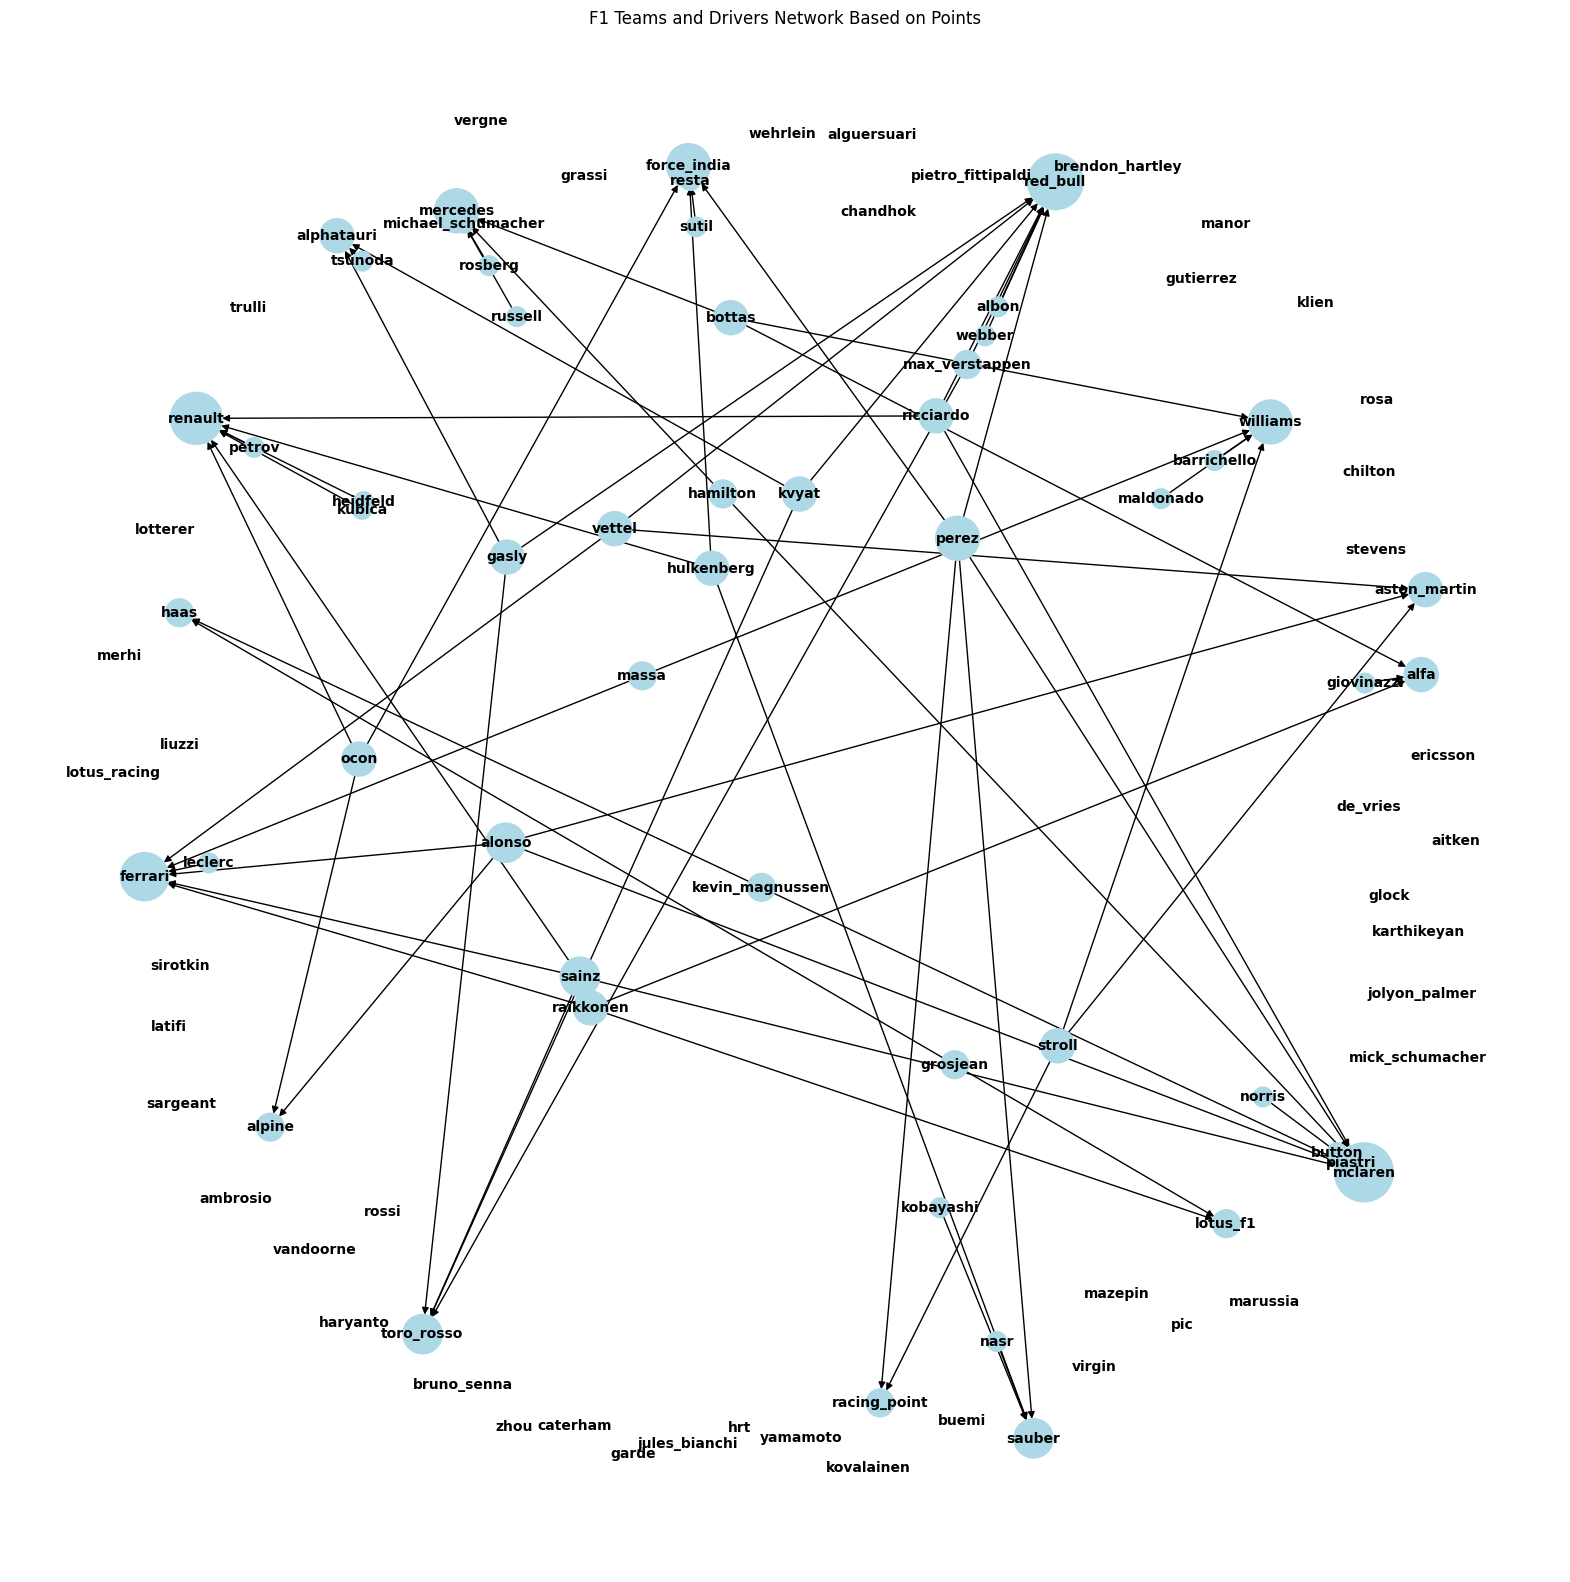

In [18]:
import networkx as nx
import matplotlib.pyplot as plt

# Create empty directed graph
G = nx.DiGraph()

# Add driver nodes with attributes
for _, driver in results_constructor_driver_merged.iterrows():
    G.add_node(driver['driverRef'], node_type='driver', nationality=driver['nationality_x'])

# Add team nodes with attributes
for _, team in results_constructor_driver_merged.iterrows():
    G.add_node(team['constructorRef'], node_type='team', nationality=team['nationality_y'])

# Adjusting edge addition to include dynamic weights based on points
for _, race in results_constructor_driver_merged.iterrows():
    driver = race['driverRef']
    team = race['constructorRef']
    points = race['points']  # Points scored in this race
    
    # Determine if this race's points qualify for edge weight adjustment
    if points >= 10:
        if G.has_edge(driver, team):
            # Update the weight based on additional points
            G[driver][team]['weight'] += points
        else:
            # Add new edge with initial weight based on the points
            G.add_edge(driver, team, weight=points, race_ids=[race['raceId']])

# Now, G contains edges weighted by the points scored in qualifying races

# Visualize the network
plt.figure(figsize=(20, 20))
pos = nx.spring_layout(G, seed=42)  # Using a fixed seed for reproducibility
# Adjusting node sizes for better visualization
node_sizes = [G.degree(node) * 200 for node in G.nodes()]
nx.draw_networkx(G, pos, with_labels=True, node_size=node_sizes, node_color='lightblue', font_size=10, font_weight='bold')
plt.title('F1 Teams and Drivers Network Based on Points')
plt.axis('off')  # Turn off the axis for better aesthetics
plt.show()

In [20]:
# Remove 'race_ids' attributes before saving
for u, v, data in G.edges(data=True):
    if 'race_ids' in data:
        del data['race_ids']  # Remove the 'race_ids' attribute

# Save the graph to a GraphML file
nx.write_graphml(G, "2weight_top5win_network_graph.graphml")

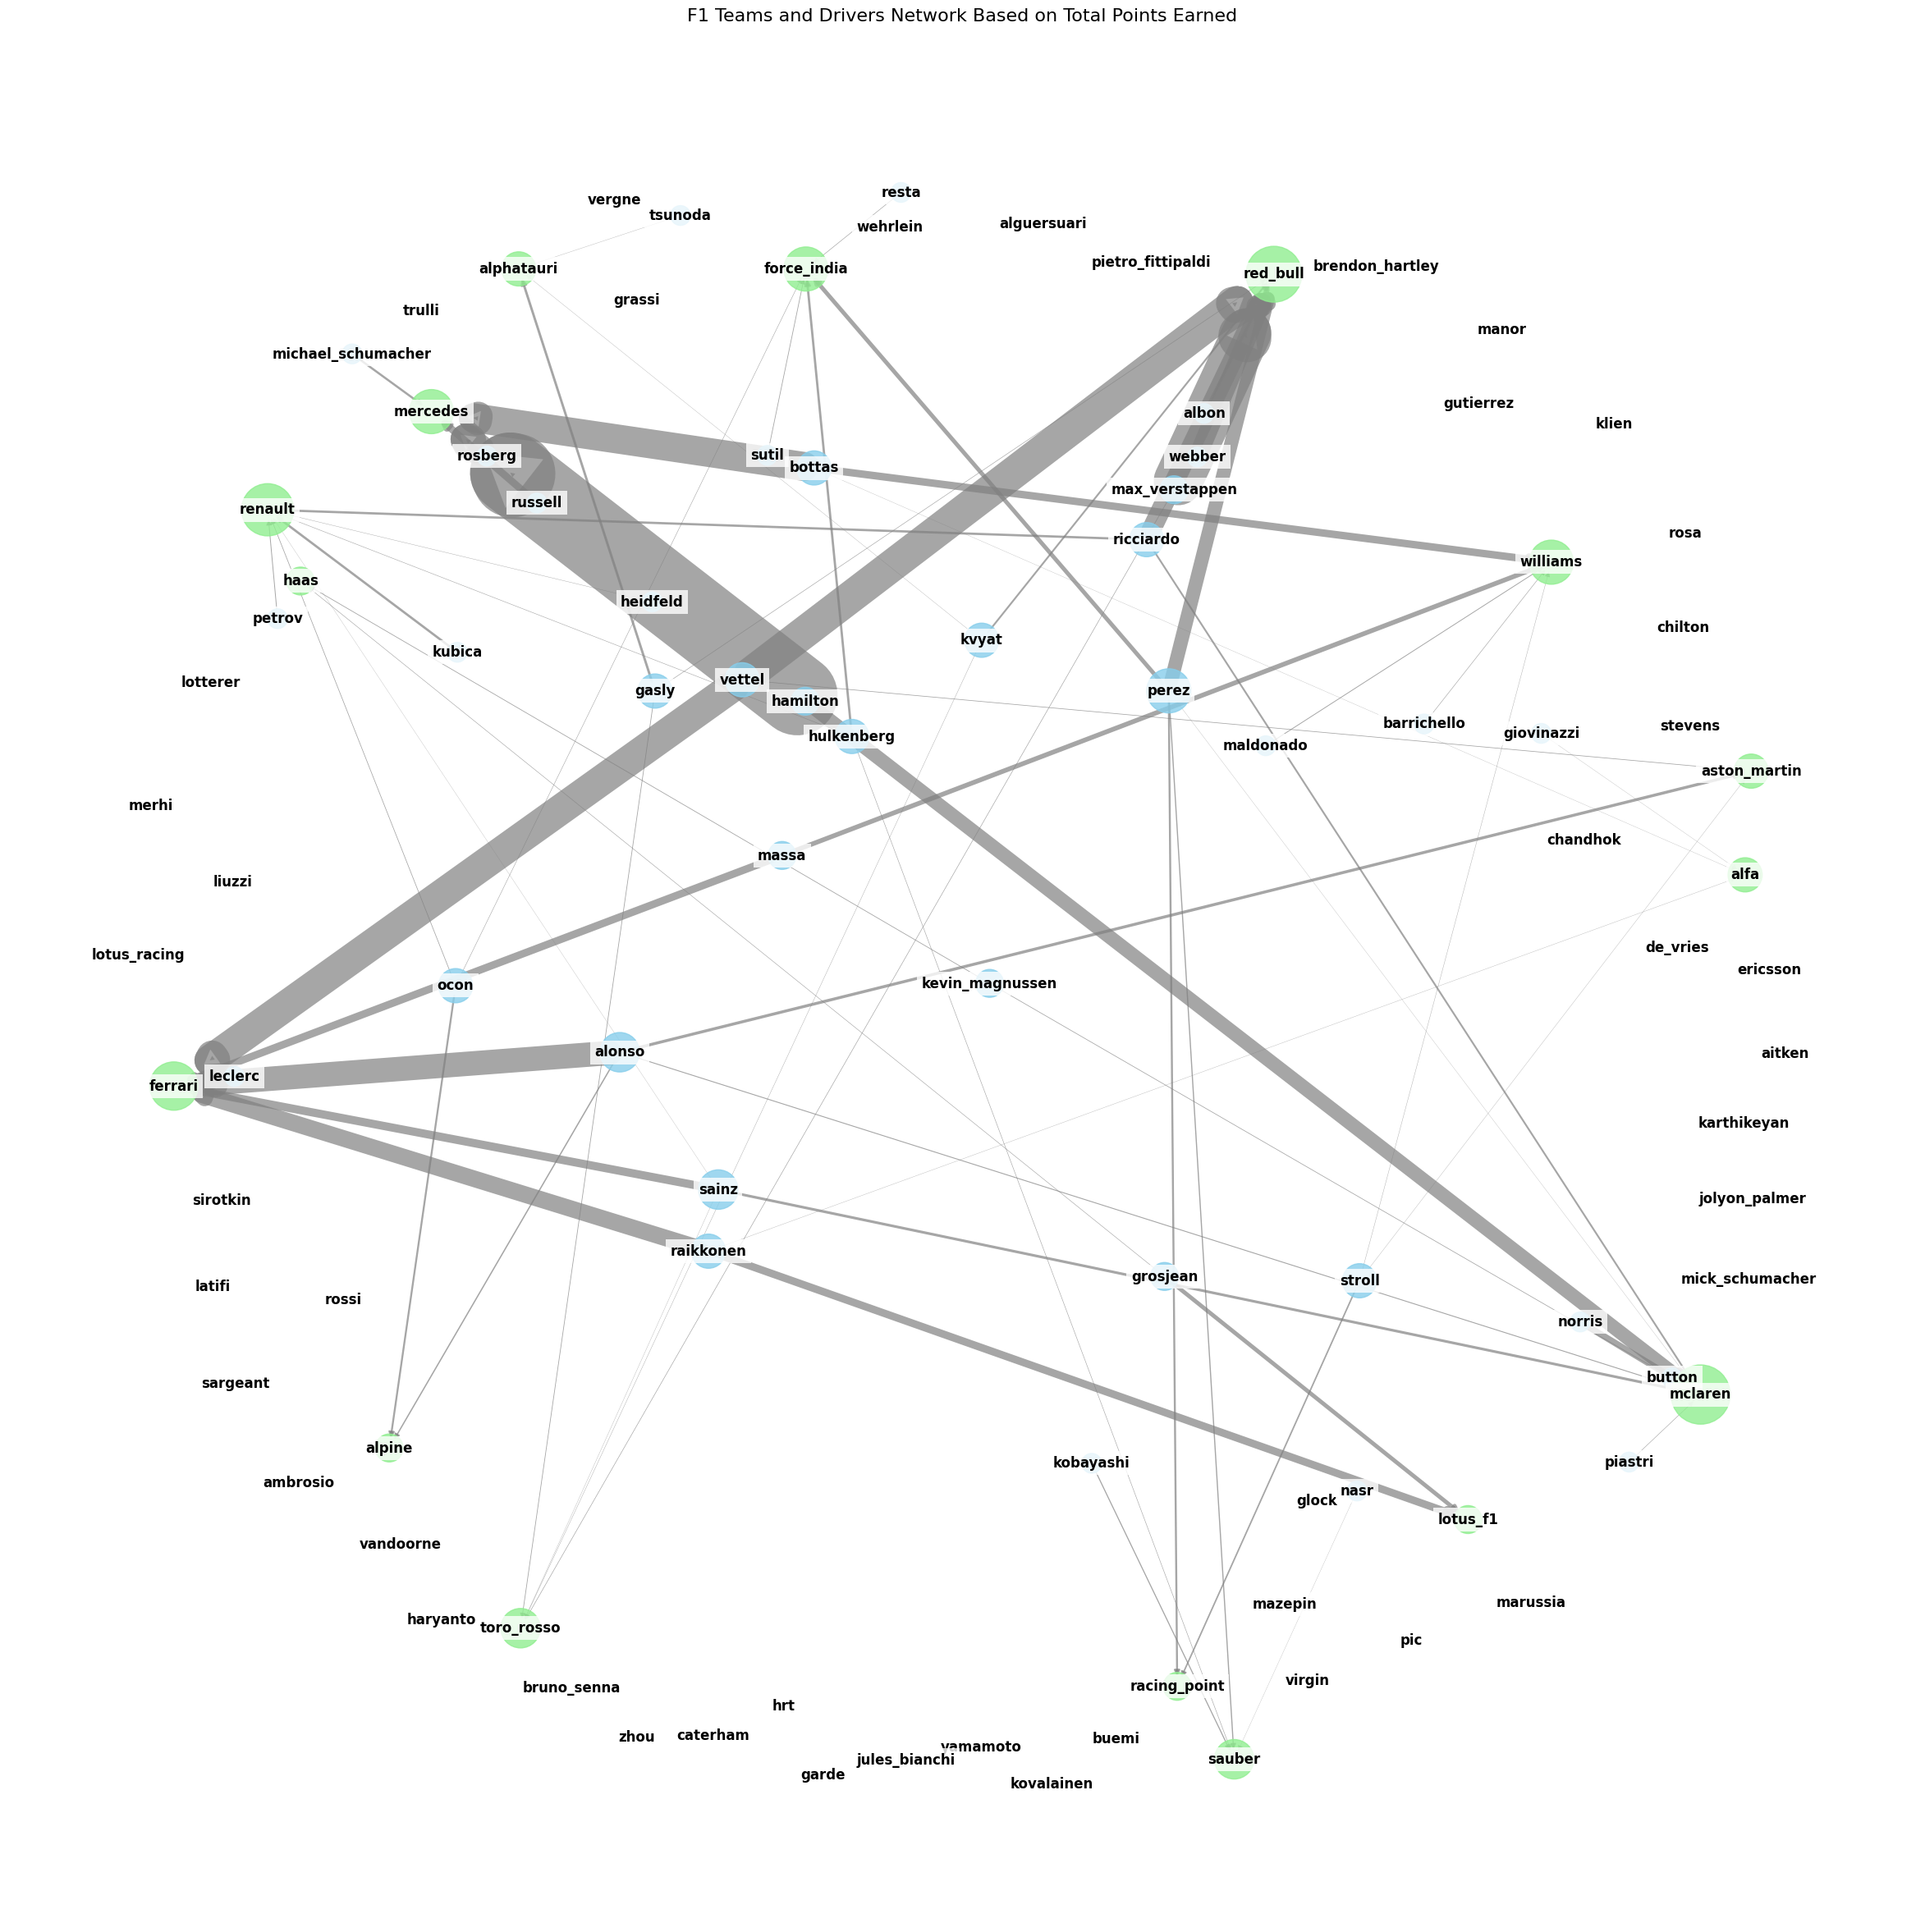

In [21]:
import matplotlib.pyplot as plt
import networkx as nx
import numpy as np

# Assuming G has already been constructed with nodes and edges, and edge weights represent the total points

# Calculate the degree of each node for node size adjustment
degrees = dict(G.degree())

# Adjust node sizes more dramatically based on degrees
node_sizes = [degrees[node] * 300 for node in G.nodes()]  # Adjust this formula as needed for visibility

# Define node colors by type: 'skyblue' for drivers, 'lightgreen' for teams
node_colors = ['skyblue' if G.nodes[node]['node_type'] == 'driver' else 'lightgreen' for node in G.nodes()]

# Create a layout for our nodes using the spring layout
pos = nx.spring_layout(G, k=0.75, iterations=50, seed=42)  # Adjust layout spacing and seed for reproducibility

# Calculate edge widths based on points earned (weights)
edge_widths = [G[u][v]['weight'] / 50 for u, v in G.edges()]  # Divide by 10 to scale edge width for visibility

# Draw the graph with adjusted node sizes and edge widths
plt.figure(figsize=(30, 30))
nx.draw_networkx_nodes(G, pos, node_size=node_sizes, node_color=node_colors, alpha=0.8)
nx.draw_networkx_edges(G, pos, edge_color='gray', width=edge_widths, alpha=0.7)
labels = nx.draw_networkx_labels(G, pos, font_size=12, font_weight='bold', bbox=dict(facecolor='white', edgecolor='none', alpha=0.8))

# Customize the plot with a title and by turning off the axis
plt.title('F1 Teams and Drivers Network Based on Total Points Earned', fontsize=16)
plt.axis('off')  # Turn off the axis for better aesthetics

# Show the plot
plt.show()

In [23]:
# Basic network analysis
print("Number of nodes:", G.number_of_nodes())
print("Number of edges:", G.number_of_edges())
print("Nodes:", G.nodes())
print("Edges:", G.edges())

# Calculate degree centrality
degree_centrality = nx.degree_centrality(G)
print("\nDegree Centrality:")


sorted_degree_centrality = sorted(degree_centrality.items(), key=lambda item: item[1], reverse=True)

# Print the sorted degree centrality values
print("Degree Centrality in descending order:")
for node, centrality in sorted_degree_centrality:
    print(f"{node}: {centrality}")


# Identify driver with highest degree centrality (most connections)
max_degree_driver = max(degree_centrality, key=degree_centrality.get)
print("\nDriver with highest degree centrality:", max_degree_driver)

Number of nodes: 98
Number of edges: 70
Nodes: ['alonso', 'massa', 'hamilton', 'vettel', 'rosberg', 'michael_schumacher', 'button', 'webber', 'liuzzi', 'barrichello', 'kubica', 'sutil', 'alguersuari', 'hulkenberg', 'kovalainen', 'buemi', 'trulli', 'rosa', 'bruno_senna', 'glock', 'petrov', 'kobayashi', 'grassi', 'chandhok', 'yamamoto', 'heidfeld', 'klien', 'resta', 'ambrosio', 'maldonado', 'perez', 'karthikeyan', 'ricciardo', 'raikkonen', 'vergne', 'pic', 'grosjean', 'gutierrez', 'bottas', 'jules_bianchi', 'chilton', 'garde', 'kevin_magnussen', 'kvyat', 'ericsson', 'lotterer', 'stevens', 'nasr', 'sainz', 'max_verstappen', 'merhi', 'rossi', 'jolyon_palmer', 'wehrlein', 'haryanto', 'vandoorne', 'ocon', 'giovinazzi', 'stroll', 'gasly', 'brendon_hartley', 'leclerc', 'sirotkin', 'norris', 'albon', 'russell', 'latifi', 'aitken', 'pietro_fittipaldi', 'tsunoda', 'mick_schumacher', 'mazepin', 'zhou', 'de_vries', 'sargeant', 'piastri', 'ferrari', 'mclaren', 'red_bull', 'mercedes', 'force_india', 

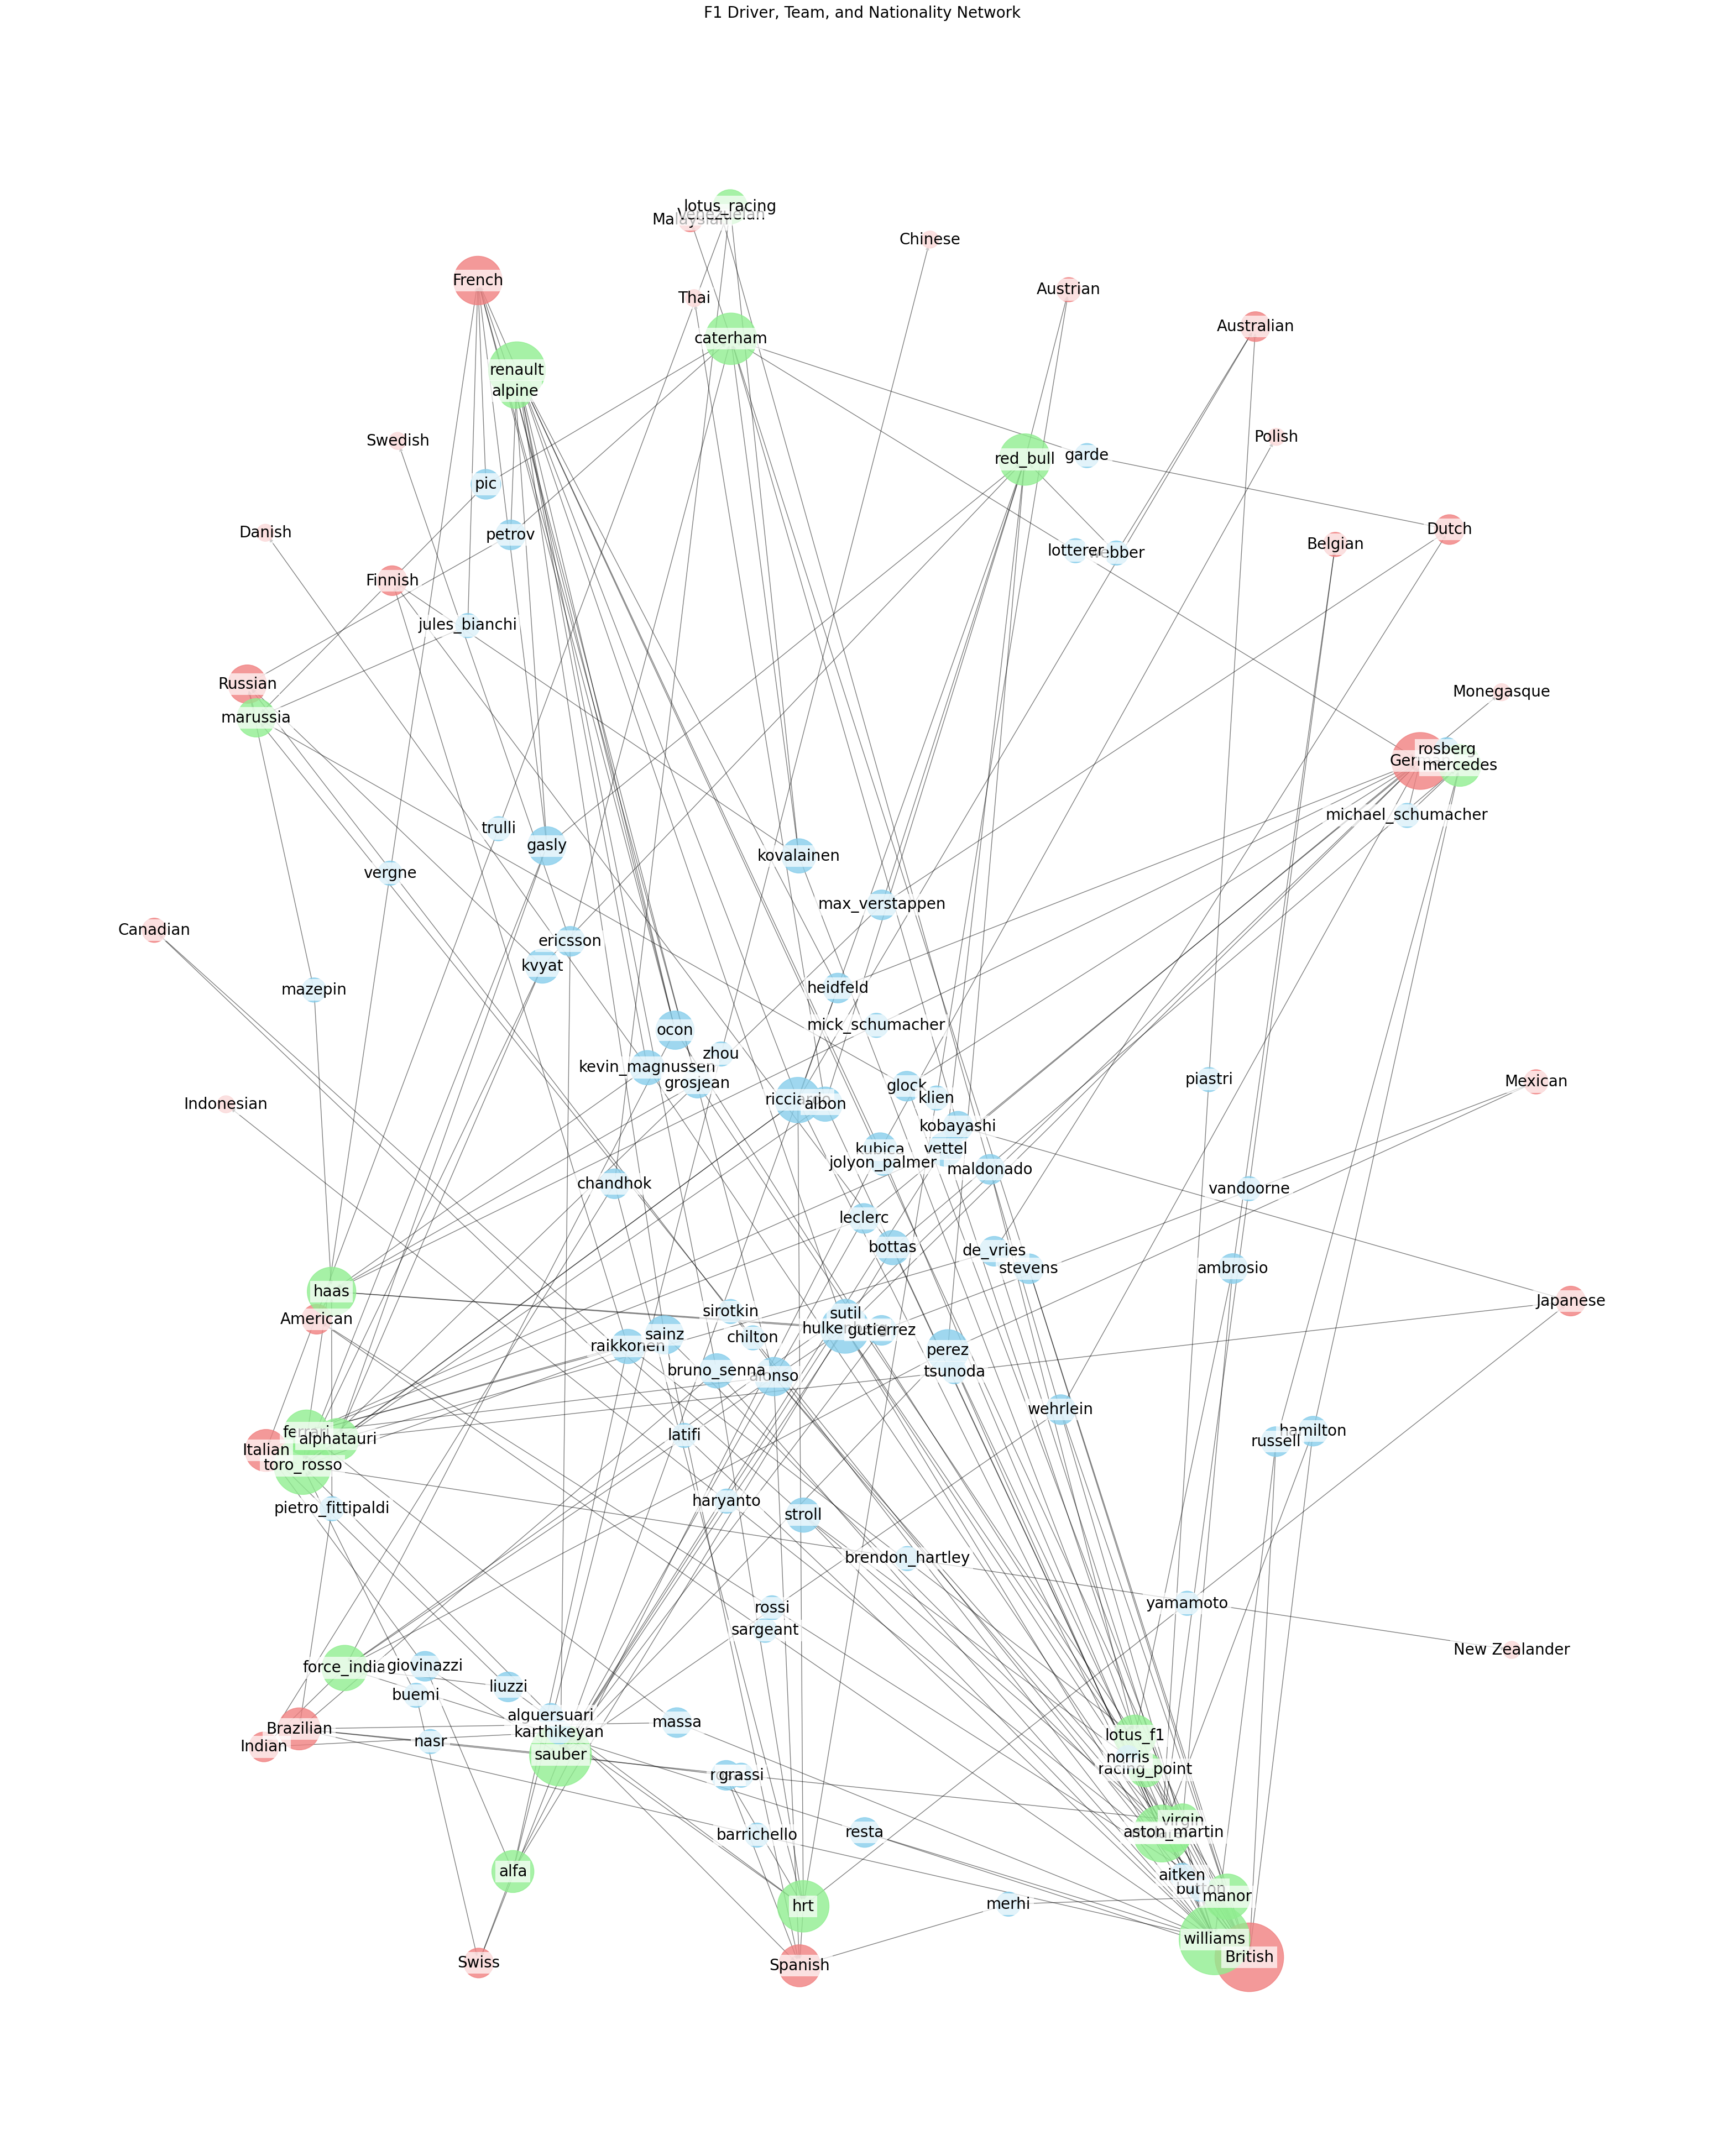

In [24]:
#ignore this part, we can just analyze the nationality based on the previous network 

import pandas as pd
import networkx as nx
import matplotlib.pyplot as plt

# Assuming results_constructor_driver_merged is your DataFrame

# Initialize a directed graph
G = nx.DiGraph()

# Step 1: Create nodes for all unique nationalities
nationalities = set(results_constructor_driver_merged['nationality_x']).union(set(results_constructor_driver_merged['nationality_y']))
for nat in nationalities:
    G.add_node(nat, type='nationality', color='lightcoral')

# Step 2: Add nodes and edges for drivers and teams
for _, row in results_constructor_driver_merged.iterrows():
    # Add driver node if it doesn't already exist
    if row['driverRef'] not in G:
        G.add_node(row['driverRef'], type='driver', color='skyblue')
    # Add team node if it doesn't already exist
    if row['constructorRef'] not in G:
        G.add_node(row['constructorRef'], type='team', color='lightgreen')
    
    # Add edges
    G.add_edge(row['driverRef'], row['constructorRef'])
    G.add_edge(row['driverRef'], row['nationality_x'])
    G.add_edge(row['constructorRef'], row['nationality_y'])

# Generate positions for nodes using a layout that spreads nodes
pos = nx.spring_layout(G,seed=0)

# Calculate the degree for each node and create a size list
degrees = dict(G.degree())
node_sizes = [degrees[node] * 500 for node in G.nodes()]  # Adjust scale as needed

#To save your graph G to a GraphML file
nx.write_graphml(G, "Driver,team,nationality_network_graph2.graphml")

# Draw the network
plt.figure(figsize=(40, 50))  # Increase figure size
nx.draw_networkx_nodes(G, pos, node_size=node_sizes, node_color=[G.nodes[n]['color'] for n in G.nodes()], alpha=0.8)
nx.draw_networkx_edges(G, pos, alpha=0.5)
nx.draw_networkx_labels(G, pos, font_size=20, bbox=dict(facecolor='white', edgecolor='none', alpha=0.7))

# Set plot title and remove axes
plt.title('F1 Driver, Team, and Nationality Network', fontsize=20)
plt.axis('off')

# Show the plot
plt.show()


In [30]:
#ignore this part

# Basic network analysis
print("Number of nodes:", G.number_of_nodes())
print("Number of edges:", G.number_of_edges())
print("Nodes:", G.nodes())
print("Edges:", G.edges())

# Calculate degree centrality
degree_centrality = nx.degree_centrality(G)
print("\nDegree Centrality:")


sorted_degree_centrality = sorted(degree_centrality.items(), key=lambda item: item[1], reverse=True)

# Print the sorted degree centrality values
print("Degree Centrality in descending order:")
for node, centrality in sorted_degree_centrality:
    print(f"{node}: {centrality}")


# Identify driver with highest degree centrality (most connections)
max_degree_driver = max(degree_centrality, key=degree_centrality.get)
print("\nDriver with highest degree centrality:", max_degree_driver)

Number of nodes: 260
Number of edges: 633
Nodes: ['Venezuelan', 'New Zealander', 'Australian', 'Portuguese', 'Chinese', 'Thai', 'Spanish', 'German', 'Dutch', 'American', 'Monegasque', 'Malaysian', 'Czech', 'Irish', 'Polish', 'Swiss', 'Brazilian', 'Austrian', 'Argentine', 'Italian', 'Swedish', 'Danish', 'Japanese', 'French', 'Finnish', 'Indian', 'Colombian', 'Russian', 'British', 'Belgian', 'Indonesian', 'Hungarian', 'Mexican', 'Canadian', 'hamilton', 'mclaren', 'heidfeld', 'bmw_sauber', 'rosberg', 'williams', 'alonso', 'renault', 'kovalainen', 'nakajima', 'bourdais', 'toro_rosso', 'raikkonen', 'ferrari', 'kubica', 'glock', 'toyota', 'sato', 'super_aguri', 'piquet_jr', 'massa', 'coulthard', 'red_bull', 'trulli', 'sutil', 'force_india', 'webber', 'button', 'honda', 'davidson', 'vettel', 'fisichella', 'barrichello', 'ralf_schumacher', 'liuzzi', 'spyker', 'wurz', 'speed', 'albers', 'markus_winkelhock', 'yamamoto', 'michael_schumacher', 'montoya', 'klien', 'monteiro', 'mf1', 'ide', 'villene